In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [7]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 117M/117M [00:06<00:00, 18.3MB/s] 

Extracting files...


Path to dataset files: C:\Users\tlili\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [10]:
import os

# List files in the dataset directory
files = os.listdir(path)
print("Files in dataset directory:", files)

# Find the CSV file and read it
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
	csv_path = os.path.join(path, csv_files[0])
	df = pd.read_csv(csv_path)
	df.info()
else:
	print("No CSV file found in the dataset directory.")

Files in dataset directory: ['amz_uk_price_prediction_dataset.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [11]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
#frequency table for the category column
frequency_table = df.category.value_counts()

In [13]:
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [ ]:
#top5 product categories    
top_5_categories = frequency_table.head(5)# the value counts already gives a serie with descending order so let's take the five first rows 
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [17]:
df.category.nunique()

296

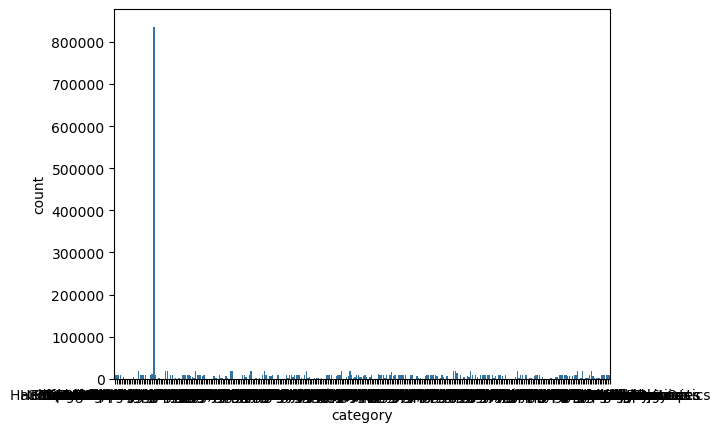

In [ ]:
#distribution of products across different categories
sns.countplot(x=df.category) 
plt.show()

#we have 296 unique category the barplot does not give a good visualisation of the distribution 

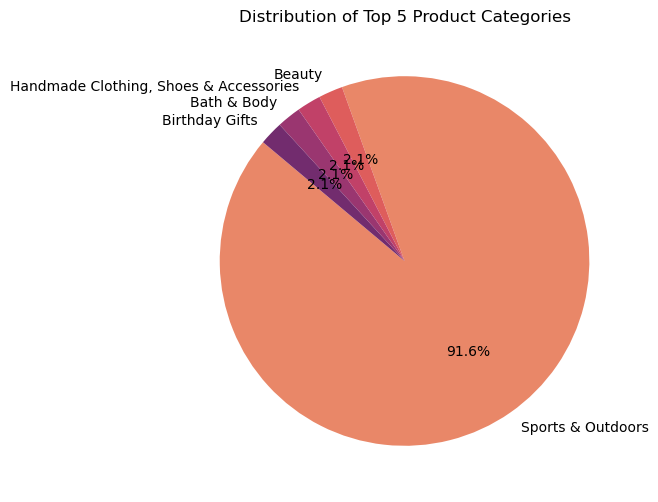

In [18]:
#distribution of the top5 categories    
colors = sns.color_palette("flare", n_colors=5) 
plt.figure(figsize=(6, 6))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Top 5 Product Categories')   
plt.show()  

## Insights
the Sport and outdoors category dominatess the dataset, 91,6% of the products belonging to this category

In [ ]:
#Measures of Centrality (price)
price_mean=df["price"].mean().round(2)
print("the mean price is",price_mean)
price_median=df["price"].median()
print("the median is",price_median)
price_mode=df["price"].mode()[0]
print("the mode is",price_mode)

the mean price is 89.24
the median is 19.09
the mode is 9.99


insights  
the average price of prioducts is 89,24. the most common price is much lower then the average price and equal to 9.99 that means that the distribution is right skewed due to the presence of some high prices (outlieres) that increase the mean 

In [ ]:
 #Measures of Dispersion (price)
variant_price = round(df["price"].var(), 2)
print("the variance of the price is", variant_price)

std_price = round(df["price"].std(), 2) 
print("the standard deviation of the price is", std_price) 

max_price = df["price"].max()   
min_price = df["price"].min()
print("the range of the price is between", min_price, "and", max_price) 

Q1 = df["price"].quantile(0.25) 
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1   
print("the interquartile range of the price is", IQR)   

the variance of the price is 119445.49
the standard deviation of the price is 345.61
the range of the price is between 0.0 and 100000.0
the interquartile range of the price is 36.0


#insights
the variance and the standars deviation are high, that means that the prices are very spread out from the mean , the price is very dispersed there is a big range betwin the minimum and the maximum price

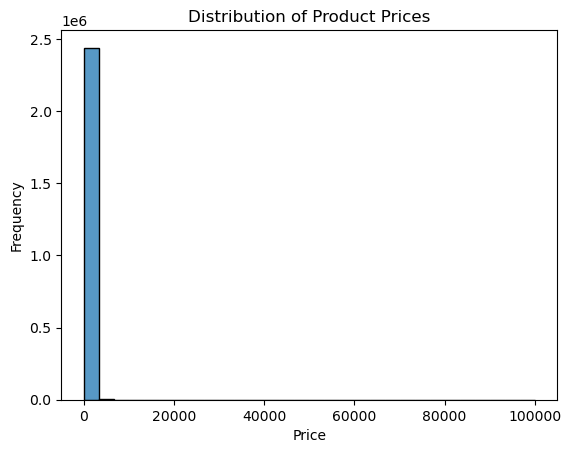

In [43]:
#visualisation of the price distribution
sns.histplot(df["price"], bins=30)
plt.title('Distribution of Product Prices') 
plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.show()  

#insights
the histogram does not show a clear distributrion due to the high number of products let's try to see distribution of Q1, Q2 and Q3 and how many products are in each quartile

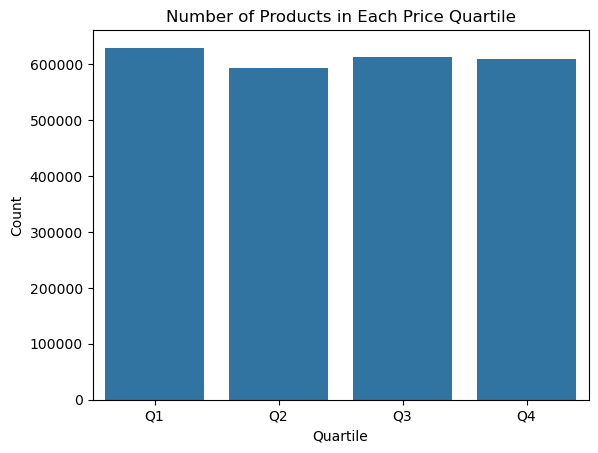

In [ ]:
#count how many products are in each quartile   
df["price_quartile"] = pd.qcut(df["price"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
sns.countplot(x="price_quartile", data=df)
plt.title("Number of Products in Each Price Quartile")
plt.xlabel("Quartile")
plt.ylabel("Count")
plt.show()


In [50]:
Q1 = df["price"].quantile(0.25) 
Q2 = df["price"].quantile(0.50)
Q3 = df["price"].quantile(0.75)
Q4 = df["price"].quantile(1.0)   
print("Q1:", Q1 , "Q2:", Q2, "Q3:", Q3, "Q4:", Q4)

Q1: 9.99 Q2: 19.09 Q3: 45.99 Q4: 100000.0


#insights   
most products are in Q1 they fall in a range price of 0 to 9,9

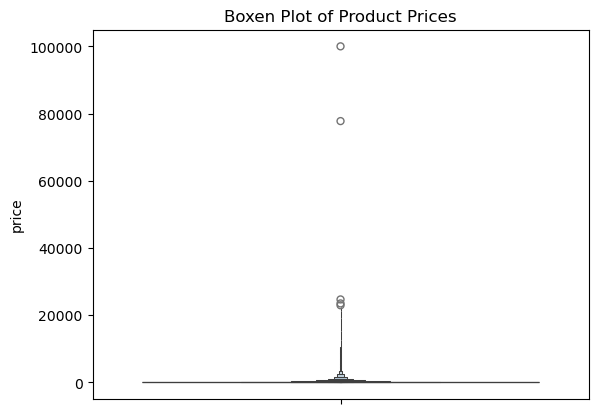

In [52]:
sns.boxenplot(y=df["price"])
plt.title("Boxen Plot of Product Prices")
plt.show()


#insights   
there are products that are priced much higher then the boxplot clearly shows outliers 

In [54]:
#Measures of Centrality (rating)
#Measures of Centrality (price)
rating_mean=df["stars"].mean().round(2)
print("the mean rating is",rating_mean)
rating_median=df["stars"].median()
print("the median rating is",rating_median)
rating_mode=df["stars"].mode()[0]
print("the mode rating is",rating_mode)

the mean rating is 2.15
the median rating is 0.0
the mode rating is 0.0


#insights
the customers usually rate the products to zero or does not fill the ratings that explaines the mode and median 0 but some customers rates are significatly high that explaines the high average of 2,15

In [58]:
 #Measures of Dispersion (rating)
variant_rating = round(df["stars"].var(), 2)
print("the variance of the rating is", variant_rating)

std_rating = round(df["stars"].std(), 2) 
print("the standard deviation of the rating is", std_rating) 

max_rating = df["stars"].max()   
min_rating = df["stars"].min()
print("the range of the rating is between", min_rating, "and", max_rating) 

Q1 = df["stars"].quantile(0.25) 
Q3 = df["stars"].quantile(0.75)
IQR = Q3 - Q1   
print("the interquartile range of the rating is", IQR)   

the variance of the rating is 4.82
the standard deviation of the rating is 2.19
the range of the rating is between 0.0 and 5.0
the interquartile range of the rating is 4.4


#insights
the ratings are not consistant there is a big variation in the feedback 

In [59]:
#Shape of the Distribution
skewness = df["stars"].skew()
kurtosis = df["stars"].kurt()

print("Skewness of rating:", round(skewness, 2))
print("Kurtosis of rating:", round(kurtosis, 2))

Skewness of rating: 0.08
Kurtosis of rating: -1.93


#insights : the skewness is very close to 0, which means the stars distribution is almost symmetric and normally distributed

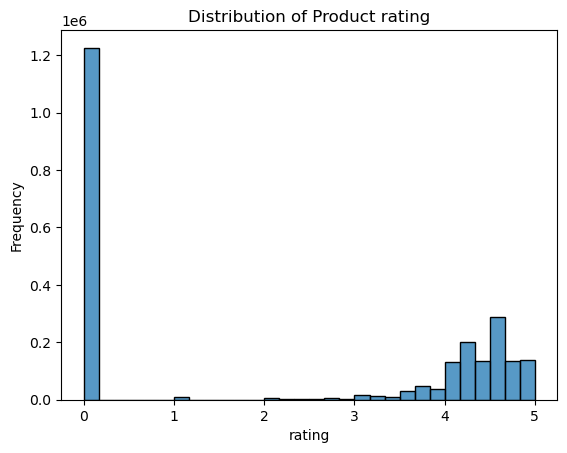

In [60]:
#visualisations

sns.histplot(df["stars"], bins=30)
plt.title('Distribution of Product rating') 
plt.xlabel('rating')
plt.ylabel('Frequency') 
plt.show()  



#insights 
the most common rating is 0